# Business Problem

Identify which questions asked on Quora are duplications of questions that have already been asked. 

This could be useful to instantly provide answers to questions that have already been answered. We are tasked with predicting whether a pair of questions are duplicates or not.

# Import Required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os


# Data Overview

In [2]:
df = pd.read_csv('/content/train.csv')
print("Number of data points:",df.shape[0])
print("Number of features:",df.shape[1])

Number of data points: 404290
Number of features: 6


In [3]:
#first 5 observations
df.head(5)

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [4]:
#last 5 observations
df.tail(5)

,id,qid1,qid2,question1,question2,is_duplicate
404285,404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404286,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1
404287,404287,537928,537929,What is one coin?,What's this coin?,0
404288,404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0
404289,404289,537932,537933,What is like to have sex with cousin?,What is it like to have sex with your cousin?,0


In [5]:
print(df.iloc[0]['question1'])

What is the step by step guide to invest in share market in india?


In [6]:
print(df.iloc[0]['question2'])

What is the step by step guide to invest in share market?


In [7]:
#Checking whether there are any rows with null values
nan_rows = df[df.isnull().any(1)]
print(nan_rows)

            id  ...  is_duplicate
105780  105780  ...             0
201841  201841  ...             0
363362  363362  ...             0

[3 rows x 6 columns]


In [8]:
df[df.isnull().any(1)]

,id,qid1,qid2,question1,question2,is_duplicate
105780,105780,174363,174364,How can I develop android app?,NaN,0
201841,201841,303951,174364,How can I create an Android app?,NaN,0
363362,363362,493340,493341,NaN,My Chinese name is Haichao Yu. What English na...,0


question1 has 1 null object or missing value and question2 has 2 null objects or missing values.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


# Exploratory Data Analysis

## What is the total number of question pairs for training?

In [10]:
print('~> Total number of question pairs for training =  {}'.format(len(df)))

~> Total number of question pairs for training =  404290


## What is distribution of class labels?

Number of duplicate(similar) and non-duplicate(non similar) questions denoted by 1 and 0 respectively.

In [11]:
df['is_duplicate'].value_counts()

0    255027
1    149263
Name: is_duplicate, dtype: int64

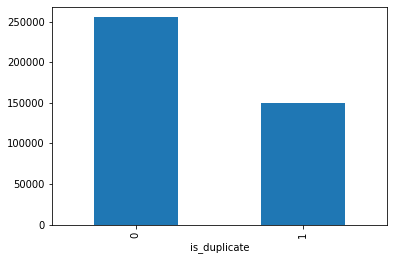

In [12]:
df.groupby('is_duplicate')['id'].count().plot.bar()

In [13]:
print('~> Question pairs are not Similar (is_duplicate = 0):   {}%'.format(100 - round(df['is_duplicate'].mean()*100, 2)))


~> Question pairs are not Similar (is_duplicate = 0):   63.08%


In [14]:
round(df[df['is_duplicate'] == 0]['is_duplicate'].count()*100 / df['is_duplicate'].count(),2)

63.08

In [15]:
print('~> Question pairs are Similar (is_duplicate = 1):  {}%'.format(round(df['is_duplicate'].mean()*100, 2)))

~> Question pairs are Similar (is_duplicate = 1):  36.92%


In [16]:
round(df[df['is_duplicate'] == 1]['is_duplicate'].count()*100 / df['is_duplicate'].count(),2)

36.92

## How many are the unique questions?

In [17]:
qids = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
unique_qs = len(np.unique(qids))
print ('Total number of  Unique Questions are: {}\n'.format(unique_qs))
#print len(np.unique(qids))


qs_morethan_onetime = np.sum(qids.value_counts() > 1)
print ('Number of unique questions that appear more than one time: {}  \n'.format(qs_morethan_onetime))
print('Percentage of unique questions that appear more than one time: {}%'.format(round(qs_morethan_onetime/unique_qs*100),2))

print ('\nMax number of times a single question is repeated: {}\n'.format(max(qids.value_counts()))) 


Total number of  Unique Questions are: 537933

Number of unique questions that appear more than one time: 111780  

Percentage of unique questions that appear more than one time: 21%

Max number of times a single question is repeated: 157



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


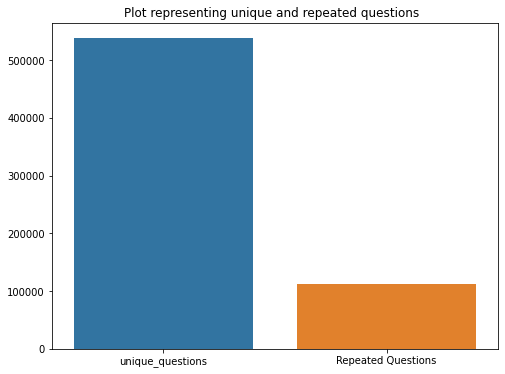

In [18]:
x = ["unique_questions" , "Repeated Questions"]
y =  [unique_qs , qs_morethan_onetime]

plt.figure(figsize=(8, 6))
plt.title ("Plot representing unique and repeated questions  ")
sns.barplot(x,y)
plt.show()

## Which is the most repeating question?

In [19]:
q_vals=qids.value_counts()
#q_vals=q_vals.values
q_vals[:4]

2559     157
30782    120
4044     111
2561      88
dtype: int64

In [20]:
df[df['qid1'] == 2559].iloc[0]['question1']

'What are the best ways to lose weight?'

## Are there are repeated pair of questions?

In [21]:
#checking whether there are any repeated pair of questions

pair_duplicates = df[['qid1','qid2','is_duplicate']].groupby(['qid1','qid2']).count().reset_index()

print ("Number of duplicate questions",(pair_duplicates).shape[0] - df.shape[0])

Number of duplicate questions 0


## What is the number of occurences for each question?

Maximum number of times a single question is repeated: 157



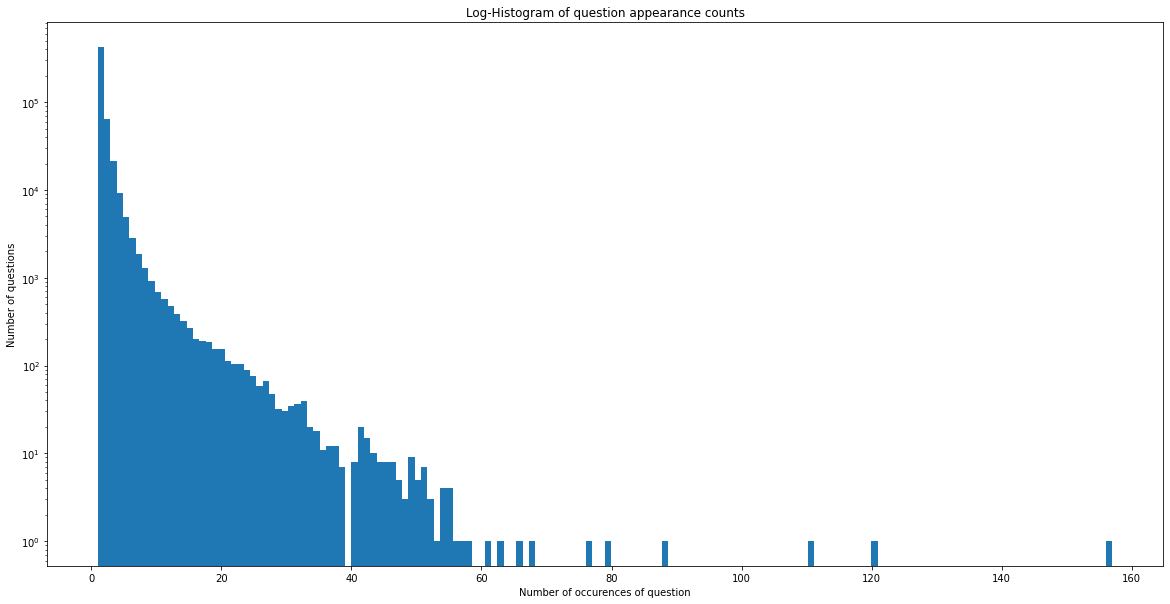

In [22]:
plt.figure(figsize=(20, 10))

plt.hist(qids.value_counts(), bins=160)

plt.yscale('log', nonposy='clip')

plt.title('Log-Histogram of question appearance counts')

plt.xlabel('Number of occurences of question')

plt.ylabel('Number of questions')

print ('Maximum number of times a single question is repeated: {}\n'.format(max(qids.value_counts()))) 

## Filling the missing values with blank strings ' ' 

In [23]:
# Filling the null values with ' '
df = df.fillna('')
nan_rows = df[df.isnull().any(1)]
print (nan_rows)

Empty DataFrame
Columns: [id, qid1, qid2, question1, question2, is_duplicate]
Index: []


# Feature Extraction Before Data Cleaning

Constructing below features:

* **freq_qid1**   = Frequency of qid1's
* **freq_qid2**   = Frequency of qid2's
* **q1len**       = String Length of Question 1
* **q2len**       = String Length of Question 2
* **q1_n_words**  = Number of words in Question 1
* **q2_n_words**  = Number of words in Question 2
* **word_Common** = (Number of common unique words in Question 1 and Question 2)
* **word_Total**  =(Total num of words in Question 1 + Total num of words in Question 2)
* **word_share**  = (word_common)/(word_Total)
* **freq_q1+freq_q2** = sum total of frequency of qid1 and qid2
* **freq_q1-freq_q2** = absolute difference of frequency of qid1 and qid2

In [24]:
qid1_1 = 'Who is the current Prime Minister?'
print(qid1_1,'~>' ,len(qid1_1))
qid2_2 = 'What is the name of the current Prime Minister?'
print(qid2_2,'~>' , len(qid2_2))

Who is the current Prime Minister? ~> 34
What is the name of the current Prime Minister? ~> 47


In [25]:

df['freq_qid1'] = df.groupby('qid1')['qid1'].transform('count') 
df['freq_qid2'] = df.groupby('qid2')['qid2'].transform('count')
df['q1len'] = df['question1'].str.len() 
df['q2len'] = df['question2'].str.len()
df['q1_n_words'] = df['question1'].apply(lambda row: len(row.split(" ")))
df['q2_n_words'] = df['question2'].apply(lambda row: len(row.split(" ")))

def normalized_word_Common(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return 1.0 * len(w1 & w2)
df['word_Common'] = df.apply(normalized_word_Common, axis=1)

def normalized_word_Total(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return 1.0 * (len(w1) + len(w2))
df['word_Total'] = df.apply(normalized_word_Total, axis=1)

def normalized_word_share(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return 1.0 * len(w1 & w2)/(len(w1) + len(w2))
df['word_share'] = df.apply(normalized_word_share, axis=1)

df['freq_q1+q2'] = df['freq_qid1']+df['freq_qid2']
df['freq_q1-q2'] = abs(df['freq_qid1']-df['freq_qid2'])

#df.to_csv("df_fe_without_preprocessing_train.csv", index=False)

df.head(5)

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,66,57,14,12,10.0,23.0,0.434783,2,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,1,51,88,8,13,4.0,20.0,0.200000,5,3
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,1,1,73,59,14,10,4.0,24.0,0.166667,2,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,1,1,50,65,11,9,0.0,19.0,0.000000,2,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,3,1,76,39,13,7,2.0,20.0,0.100000,4,2


In [26]:
df.shape

(404290, 17)

## Analysis of the features extracted above

Minimum length in terms of number of words. 

In [27]:
print ("Minimum length of the questions in question1 : " , min(df['q1_n_words']))
# It shows that there are some questions with one word only.

print ("Minimum length of the questions in question2 : " , min(df['q2_n_words']))
# It shows that there are some questions with one word only.

print ("Number of Questions with minimum length [question1] :", df[df['q1_n_words']== 1].shape[0])
# There are 67 questions in qid1 with one word only.

print ("Number of Questions with minimum length [question2] :", df[df['q2_n_words']== 1].shape[0])
# There are 24 questions in qid2 with one word only.


Minimum length of the questions in question1 :  1
Minimum length of the questions in question2 :  1
Number of Questions with minimum length [question1] : 67
Number of Questions with minimum length [question2] : 24


* Below we can see that the feature 'word_share' has quite a lot of predictive power, as it is good at separating the duplicate questions from the non-duplicate ones. Interestingly, it seems very good at identifying questions which are definitely different, but is not so great at finding questions which are definitely duplicates.

* The distributions for normalized word_share have some overlap on the far right-hand side, i.e., there are quite a lot of questions with high word similarity
* The average word share and Common no. of words of qid1 and qid2 is more when they are duplicate(Similar)/


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


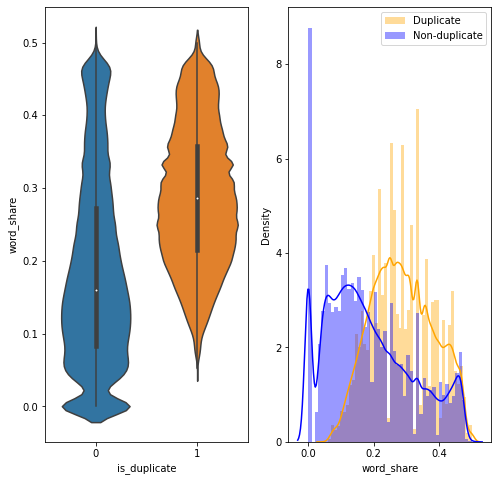

In [30]:
plt.figure(figsize=(8, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'word_share', data = df[0:])

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate'] == 1.0]['word_share'][0:] , label = "Duplicate", color = 'Orange')
sns.distplot(df[df['is_duplicate'] == 0.0]['word_share'][0:] , label = "Non-duplicate" , color = 'blue' )
plt.legend()
plt.show();

* In the below plot, the distributions of the word_Common feature in similar and non-similar questions are highly overlapping. Hence, this feature is not that useful to us.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


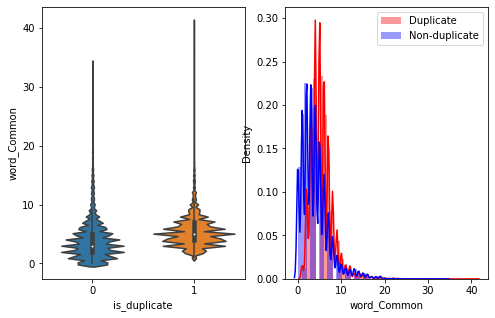

In [33]:
plt.figure(figsize=(8,5))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'word_Common', data = df[0:])

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate'] == 1.0]['word_Common'][0:] , label = "Duplicate", color = 'red')
sns.distplot(df[df['is_duplicate'] == 0.0]['word_Common'][0:] , label = "Non-duplicate" , color = 'blue' )
plt.legend()
plt.show();

* In the below plot, the distributions are highly overlapping. Hence, this feature is not at all helpful in distinguishing duplicate and non-duplicate questions.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


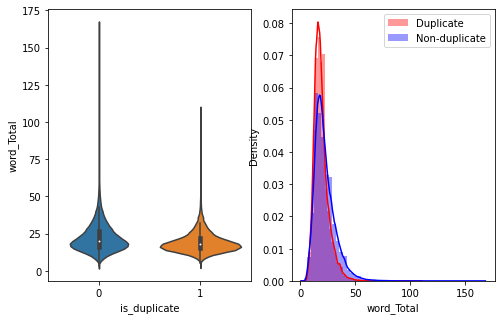

In [34]:
plt.figure(figsize=(8, 5))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'word_Total', data = df[0:])

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate'] == 1.0]['word_Total'][0:] , label = "Duplicate", color = 'red')
sns.distplot(df[df['is_duplicate'] == 0.0]['word_Total'][0:] , label = "Non-duplicate" , color = 'blue' )
plt.legend()
plt.show();

## Correlation Plot

In [35]:
df.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate',
       'freq_qid1', 'freq_qid2', 'q1len', 'q2len', 'q1_n_words', 'q2_n_words',
       'word_Common', 'word_Total', 'word_share', 'freq_q1+q2', 'freq_q1-q2'],
      dtype='object')

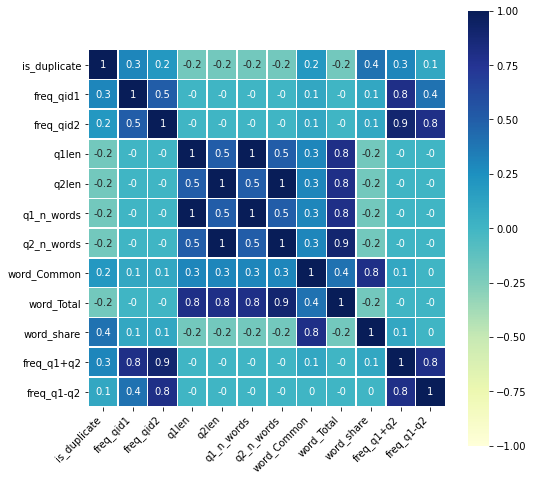

In [46]:
cols = ['is_duplicate',
       'freq_qid1', 'freq_qid2', 'q1len', 'q2len', 'q1_n_words', 'q2_n_words',
       'word_Common', 'word_Total', 'word_share', 'freq_q1+q2', 'freq_q1-q2']
corr = df[cols].corr()
fig, ax = plt.subplots(figsize=(8,8))  
ax = sns.heatmap(
    round(corr,1), 
    vmin=-1, vmax=1, center=0,annot=True,linewidths=.5,
    cmap="YlGnBu",
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

# Download data along with additional features till here.

In [ ]:
# following code if using Google colab
from google.colab import files
df.to_csv('train_part_1.csv') 
files.download('train_part_1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# End of Part-1